<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/204793_stepik_pandas_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сегодня мы будем работать с встроенным датасетом из библиотеки sklearn: California housing, содержащем информацию о жилье в Калифорнии.

Для начала загрузим датасет. Выполните код ниже.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

**Описание данных:**   
MedInc: Средний доход в районе \
HouseAge: Средний возраст домов в районе \
AveRooms: Среднее количество комнат \
AveBedrms: Среднее количество спален \
Population: Количество жителей \
AveOccup: Среднее количество жильцов \
Latitude: Географическая широта \
Longitude: Географическая долгота \
MedHouseVal: Средняя стоимость домов в районе \

Посмотрим на первые 5 строк в датасете.

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Выполните задания ниже.

### Задание 1

Чему равно количество строк и столбцов в датасете?

In [4]:
df.shape

(20640, 9)

### Задание 2

Есть ли в датасете пропуски?

In [5]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


### Задание 3

Найдите среднее значение переменной `HouseAge`.

In [8]:
df['HouseAge'].mean().round(2)

28.64

### Задание 4

Найдите стандартное отклонение переменной `AveBedrms`

In [11]:
round(df['AveBedrms'].std(), 2)

0.47

### Задание 5

Создайте новую переменную `is_expensive`, которая принимает значение 1, если значение переменной `MedHouseVal` больше среднего значения переменной `MedHouseVal`, и 0 в противном случае.

Чему равно среднее значение переменной `is_expensive`?

In [15]:
#df['is_expensive'] = np.where(df['MedHouseVal'] > df['MedHouseVal'].mean(), 1, 0)
df['is_expensive'] = (df['MedHouseVal'] > df['MedHouseVal'].mean()).astype(int)

### Задание 6

Чему равна мода переменной `is_expensive`?

In [18]:
df['is_expensive'].mean().round(2)

0.41

### Задание 7

Насколько отличается среднее значение переменной `AveRooms` в дорогих районах ( `is_expensive` = 1) и в дешевых (`is_expensive` = 0)?

In [21]:
round(df['AveRooms'][df['is_expensive'] == 1].mean() - df['AveRooms'][df['is_expensive'] == 0].mean(), 2)

0.56

### Задание 8

Постройте матрицу корреляций между переменными. Какая переменная (помимо самой переменной `MedHouseVal`, а также созданной ранее переменной `is_expensive`) имеет наибольшую (по модулю) корреляцию с переменной `MedHouseVal`?

Используйте метод `.corr()`

In [33]:
df.corr().loc['MedHouseVal'].sort_values(ascending = False).iloc[2].round(2)

0.69

### Задание 9

Постройте гистограмму распределения переменной `Population`. Используйте значение параметра `bins=50`

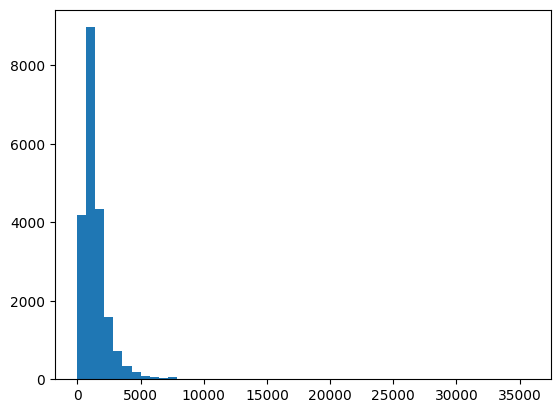

In [36]:
import matplotlib.pyplot as plt

plt.hist(df['Population'], bins = 50)
plt.show()

### Задание 10

Постройте диаграмму рассеяния (scatter plot) для переменных `MedHouseVal` и `AveRooms`

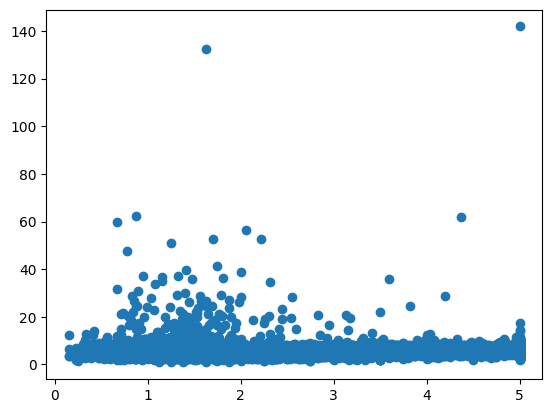

In [38]:
plt.scatter(df['MedHouseVal'], df['AveRooms'])
plt.show()

### Задание 11

Попробуем построить линейную регрессию для прогнозирования переменной  `MedHouseVal` на основе переменных `MedInc`, `HouseAge`, `AveRooms`.
Для этого будем использовать библиотеку `scikit-learn`. С документацией можете более подробно ознакомиться здесь https://scikit-learn.org/stable/index.html

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Разделим выборку на обучающую и тестовую:

In [40]:
X = df[['MedInc', 'HouseAge', 'AveRooms']]
y = df['MedHouseVal']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=42)

Обучим модель на обучающей выборке:

In [41]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

Посмотрим на коэффициенты модели:

In [42]:
lr.coef_

array([ 0.44191756,  0.01683785, -0.02551413])

Сделаем предсказание на обучающей выборке, посчитаем среднеквадратичную ошибку:

In [43]:
pred_train = lr.predict(Xtrain)

In [44]:
mean_squared_error(ytrain, pred_train)

0.6539668957988426

Сделайте предсказание для тестовой выборки. Посчитайте среднеквадратичную ошибку

In [47]:
# ваш код здесь
pred_test = lr.predict(Xtest)
round(mean_squared_error(ytest, pred_test), 2)

0.64